<a href="https://colab.research.google.com/github/odarrieta/odarrieta/blob/main/Hachathon3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/odarrieta/odarrieta/blob/main/Hachathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cargar los archivos CSV
survey_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_train.csv')
travel_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_train.csv')

# Mostrar las primeras filas de cada conjunto de datos

display(survey_train.head())
display(travel_train.head())

# Información general de los conjuntos de datos

print(survey_train.info())
print(travel_train.info())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [6]:
# Unir los datos de encuesta y de viaje
train_data = pd.merge(survey_train, travel_train, on='ID')

# Mostrar las primeras filas del conjunto de datos combinado
display(train_data.head())

# Revisar los valores faltantes en el conjunto de datos combinado
missing_values = train_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0



Missing values in each column:
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64


In [7]:
# Imputar valores faltantes para variables categóricas utilizando la moda
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Imputar valores faltantes para variables numéricas utilizando la media
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

# Verificar si todavía hay valores faltantes
missing_values_after_imputation = train_data.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar las características y la variable objetivo
X = train_data.drop(columns=['ID', 'Overall_Experience'])
y = train_data['Overall_Experience']

# Identificar las columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Combinar las variables codificadas y normalizadas
X_processed = pd.concat([X_scaled_df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Ver las primeras filas de los datos procesados
display(X_processed.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,0.832369,-1.660469,-0.384165,-0.260781,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.567712,0.215099,-0.148112,-0.391103,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.236891,-0.892926,1.635398,2.710567,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.303056,-1.166284,-0.043200,0.078057,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.700041,0.002054,-0.384165,-0.391103,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = log_reg.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.9036


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_rf = random_forest.predict(X_val)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")

Accuracy of Random Forest: 0.9490


In [11]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best score: 0.9461213769887614


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Configuración del modelo con los mejores hiperparámetros encontrados
best_rf = RandomForestClassifier(
    n_estimators=300,  # número de árboles
    max_depth=20,       # profundidad máxima de cada árbol
    min_samples_split=2,# mínimo número de muestras requeridas para dividir un nodo interno
    min_samples_leaf=1, # mínimo número de muestras requeridas en un nodo hoja
    random_state=42     # semilla para la reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento completos
best_rf.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
y_val_pred = best_rf.predict(X_val)

# Evaluar la precisión en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with optimized parameters: {val_accuracy:.4%}")


Validation Accuracy with optimized parameters: 94.6758%


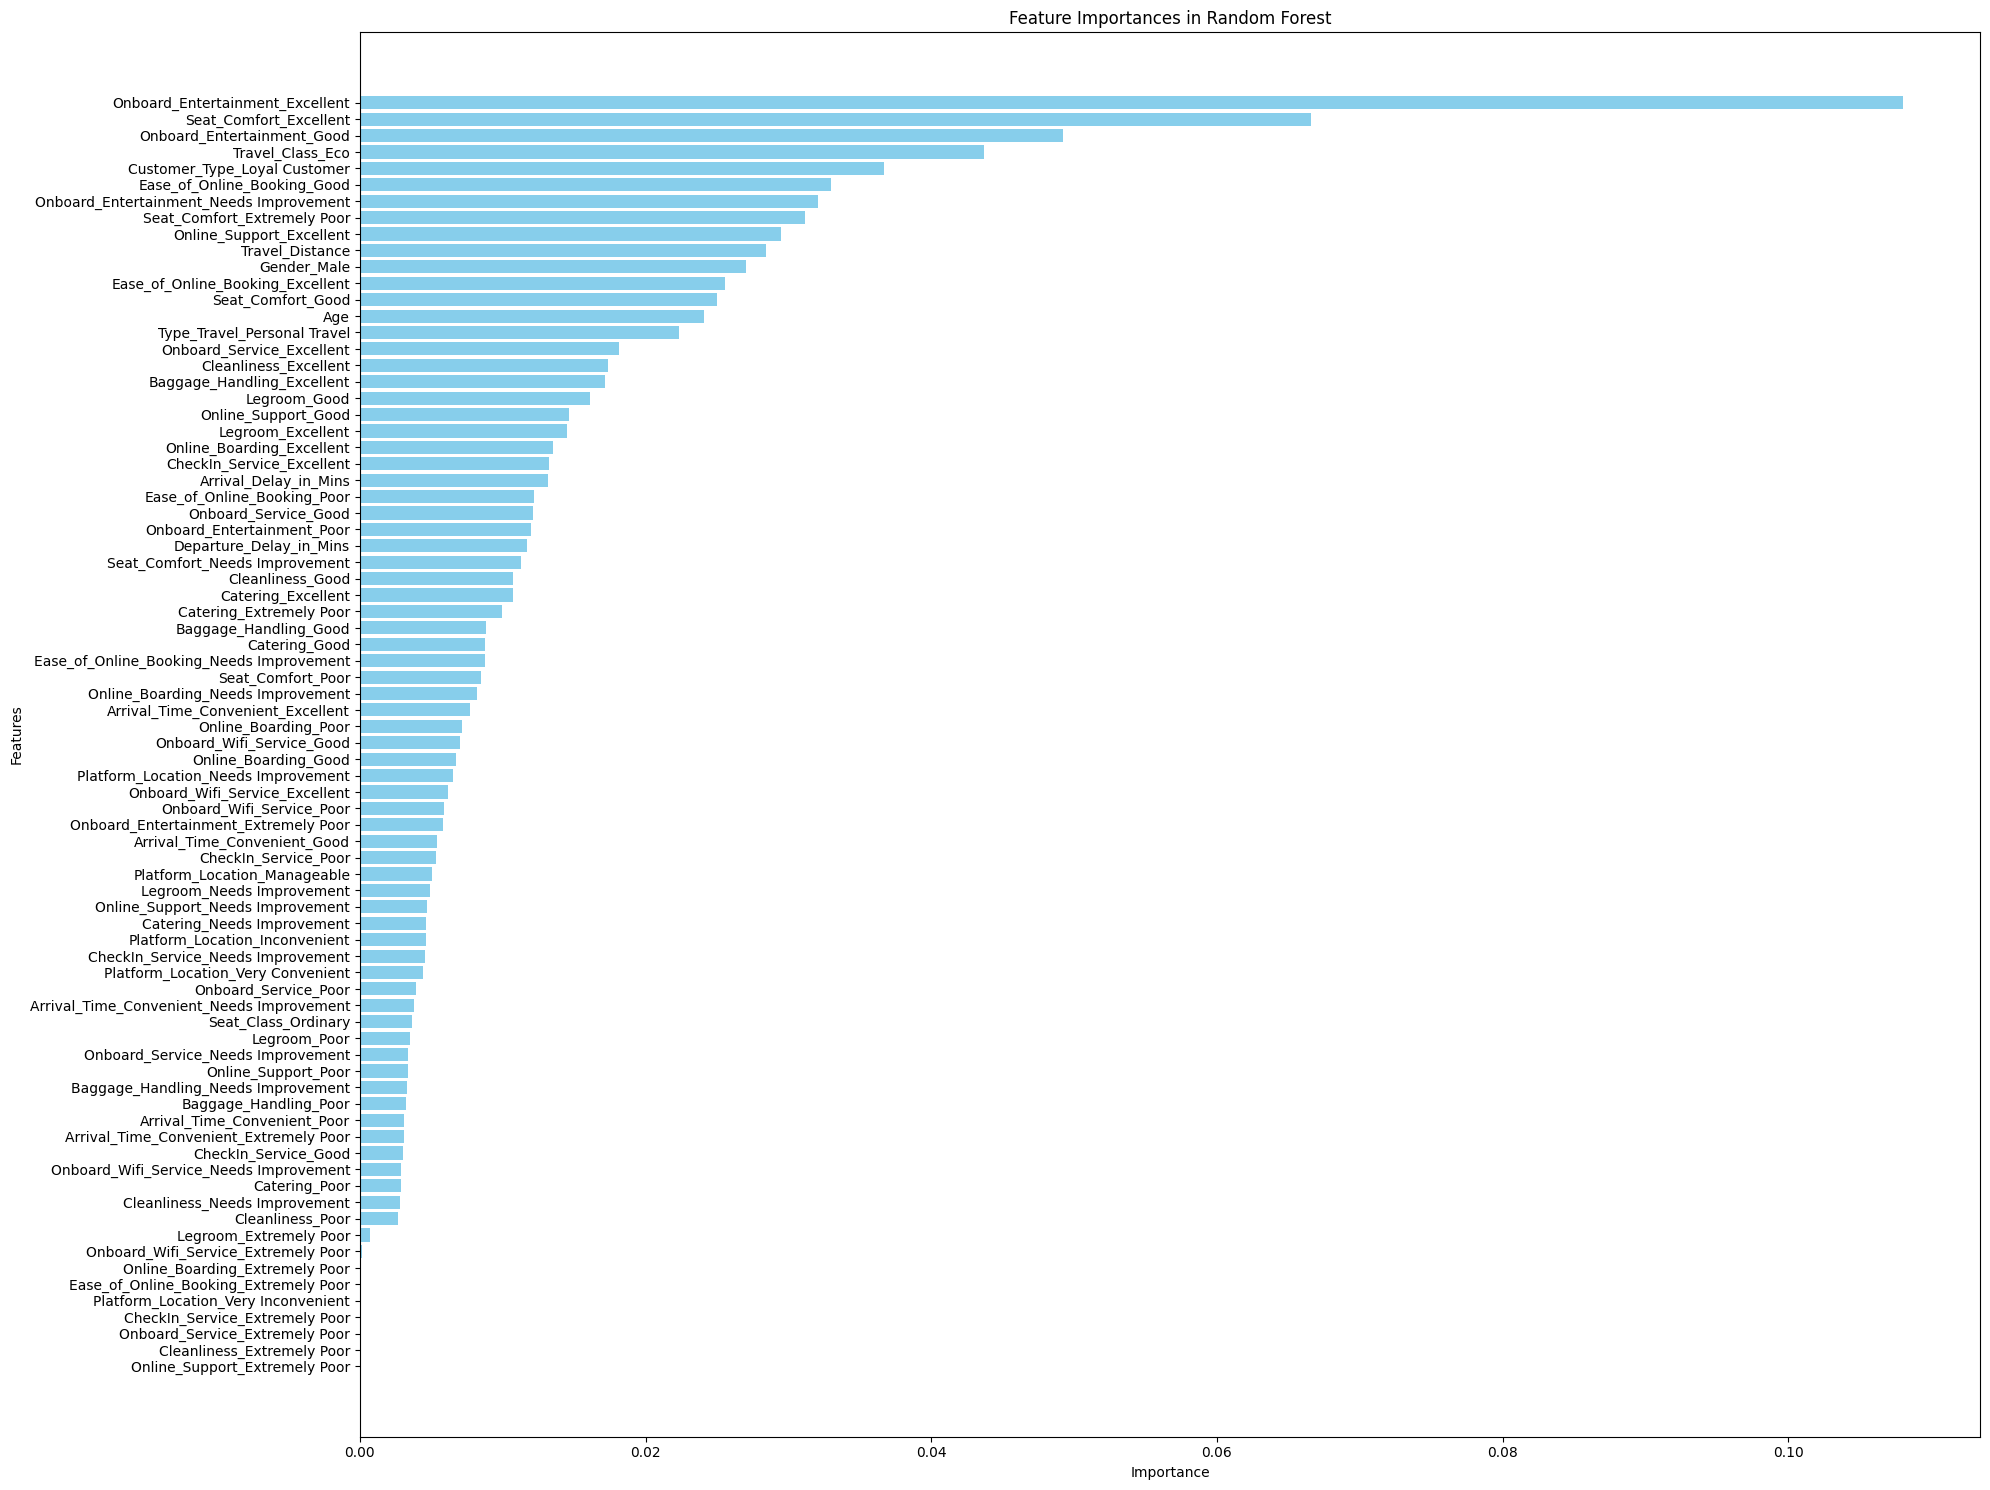

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Obteniendo la importancia de las características y los nombres correspondientes
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para facilitar la manipulación y visualización
importances_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importances})

# Ordenar las características por importancia de manera descendente
importances_df = importances_df.sort_values(by='Importance', ascending=True)  # Cambio aquí para que el más importante esté arriba en horizontal

# Crear el gráfico de barras, esta vez horizontal
plt.figure(figsize=(20, 15))  # Ajusta el tamaño para dar más espacio
plt.barh(importances_df['Features'], importances_df['Importance'], color='skyblue')  # Gráfico horizontal
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.tight_layout()  # Ajusta automáticamente los subplots

plt.show()


In [16]:
import pandas as pd

# Suponiendo que 'feature_importances' es un array de importancias obtenido de un RandomForest
threshold = 0.02  # Define un umbral de importancia, por ejemplo 0.01
features_to_drop = [feature for feature, importance in zip(X_train.columns, feature_importances) if importance < threshold]

# Eliminar estas características de X_train y X_val
X_train_reduced = X_train.drop(columns=features_to_drop)
X_val_reduced = X_val.drop(columns=features_to_drop)

print("Características eliminadas:", features_to_drop)


Características eliminadas: ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Seat_Comfort_Needs Improvement', 'Seat_Comfort_Poor', 'Seat_Class_Ordinary', 'Arrival_Time_Convenient_Excellent', 'Arrival_Time_Convenient_Extremely Poor', 'Arrival_Time_Convenient_Good', 'Arrival_Time_Convenient_Needs Improvement', 'Arrival_Time_Convenient_Poor', 'Catering_Excellent', 'Catering_Extremely Poor', 'Catering_Good', 'Catering_Needs Improvement', 'Catering_Poor', 'Platform_Location_Inconvenient', 'Platform_Location_Manageable', 'Platform_Location_Needs Improvement', 'Platform_Location_Very Convenient', 'Platform_Location_Very Inconvenient', 'Onboard_Wifi_Service_Excellent', 'Onboard_Wifi_Service_Extremely Poor', 'Onboard_Wifi_Service_Good', 'Onboard_Wifi_Service_Needs Improvement', 'Onboard_Wifi_Service_Poor', 'Onboard_Entertainment_Extremely Poor', 'Onboard_Entertainment_Poor', 'Online_Support_Extremely Poor', 'Online_Support_Good', 'Online_Support_Needs Improvement', 'Online_Support_Poor', '

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Reentrenar el modelo con el conjunto reducido de características
best_rf.fit(X_train_reduced, y_train)

# Evaluar el modelo en el conjunto de validación reducido
y_val_pred = best_rf.predict(X_val_reduced)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred)

print(f"Accuracy on reduced feature set: {val_accuracy:.2%}")
print(f"F1 Score on reduced feature set: {val_f1_score:.2f}")


Accuracy on reduced feature set: 91.32%
F1 Score on reduced feature set: 0.92


In [18]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada para evaluar la estabilidad del modelo
scores = cross_val_score(best_rf, X_train_reduced, y_train, cv=5)
print("Cross-validated accuracy scores:", scores)
print("Mean cross-validated accuracy:", np.mean(scores))


Cross-validated accuracy scores: [0.91417787 0.91179392 0.91192636 0.91337748 0.91225166]
Mean cross-validated accuracy: 0.9127054583026167


In [19]:
# Cargar los archivos CSV del conjunto de prueba
survey_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_test.csv')

# Unir los datos de encuesta y de viaje
test_data = pd.merge(survey_test, travel_test, on='ID')

In [20]:
missing_values = test_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64


In [21]:
# Determinar las columnas numéricas excluyendo 'Overall_Experience' desde el inicio
numerical_columns = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64'] and col not in ['ID', 'Overall_Experience']]

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cargar los archivos CSV del conjunto de prueba
survey_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hachathon/Traveldata_test.csv')

# Unir los datos de encuesta y de viaje
test_data = pd.merge(survey_test, travel_test, on='ID')

# Imputar valores faltantes para variables categóricas utilizando la moda del conjunto de entrenamiento
for col in categorical_columns:
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Imputar valores faltantes para variables numéricas utilizando la media del conjunto de entrenamiento
for col in numerical_columns:
    test_data[col].fillna(train_data[col].mean(), inplace=True)

# Preparar las características del conjunto de prueba (excluyendo 'ID')
X_test = test_data.drop(columns=['ID'])

# Aplicar la misma codificación One-Hot utilizada para el conjunto de entrenamiento
X_test_encoded = encoder.transform(X_test[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Aplicar la misma normalización utilizada para el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test[numerical_columns])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns)

# Combinar las variables codificadas y normalizadas
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [23]:
# Imprimir las columnas disponibles en el conjunto de datos de prueba
print(test_data.columns)


Index(['ID', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Age',
       'Type_Travel', 'Travel_Class', 'Travel_Distance',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')


In [24]:
# Suponiendo que 'test_data' ya está cargado y contiene las características necesarias menos 'Overall_Experience'
X_test = test_data.drop(columns=['ID'])  # Asegúrate de eliminar cualquier columna no necesaria

# Aplicar la misma codificación One-Hot utilizada para el conjunto de entrenamiento
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

# Aplicar la misma normalización utilizada para el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test[numerical_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)

# Combinar las variables codificadas y normalizadas
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)
# Verificar que las columnas de los conjuntos procesados coincidan


In [25]:
# Verificar las primeras filas de los datos procesados para asegurar que todo parece correcto
print(X_test_processed.head())


        Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0 -0.226258        -1.407540                -0.384165              -0.391103   
1 -1.218722        -0.538825                -0.148112               0.338702   
2  1.361683         0.829911                -0.384165              -0.391103   
3 -0.689408        -0.609840                -0.384165              -0.391103   
4 -1.417214        -0.358856                 0.061712              -0.391103   

   Seat_Comfort_Excellent  Seat_Comfort_Extremely Poor  Seat_Comfort_Good  \
0                     0.0                          0.0                0.0   
1                     0.0                          1.0                0.0   
2                     1.0                          0.0                0.0   
3                     0.0                          0.0                0.0   
4                     1.0                          0.0                0.0   

   Seat_Comfort_Needs Improvement  Seat_Comfort_Poor  Se

In [26]:
# Suponiendo que tienes 'X_train_processed' para comparar
assert X_processed.columns.tolist() == X_test_processed.columns.tolist(), "Las columnas del conjunto de prueba no coinciden con las del conjunto de entrenamiento"


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Asumiendo que quieres usar un RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_processed, y)  # 'y' debería ser tu vector objetivo del conjunto de entrenamiento

# Ahora puedes hacer predicciones o guardar tu modelo para uso futuro


RandomForestClassifier(random_state=42)

In [28]:
# Asumiendo que 'model' es tu modelo ya entrenado y 'X_test_processed' es tu conjunto de prueba procesado
y_test_pred = model.predict(X_test_processed)

# Opcionalmente, si deseas obtener probabilidades en lugar de clasificaciones directas
# y_test_proba = model.predict_proba(X_test_processed)[:, 1]  # Para obtener probabilidades de la clase positiva


In [29]:
import pandas as pd

# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    'ID': test_data['ID'],  # Asumiendo que test_data tiene una columna 'ID'
    'Overall_Experience': y_test_pred
})

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('submission.csv', index=False)

# Mostrar las primeras filas de las predicciones
print(predictions_df.head())


         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [30]:
from google.colab import files

# Asegúrate de que el nombre del archivo y la ruta sean correctos
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>